<a href="https://colab.research.google.com/github/Yenugudharani/Sales-Prediction/blob/main/ANNsalesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")
df.head()
#checking missing values
print(df.isnull().sum())  # Count missing values in each column
df.fillna(df.select_dtypes(include=["number"]).mean(), inplace=True)




Saving car_purchasing.csv to car_purchasing (1).csv
customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [3]:
df.fillna(df.select_dtypes(include=["object"]).mode().iloc[0], inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)
import numpy as np
numeric_df = df.select_dtypes(include=["number"])  # Select only numeric columns

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [4]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))


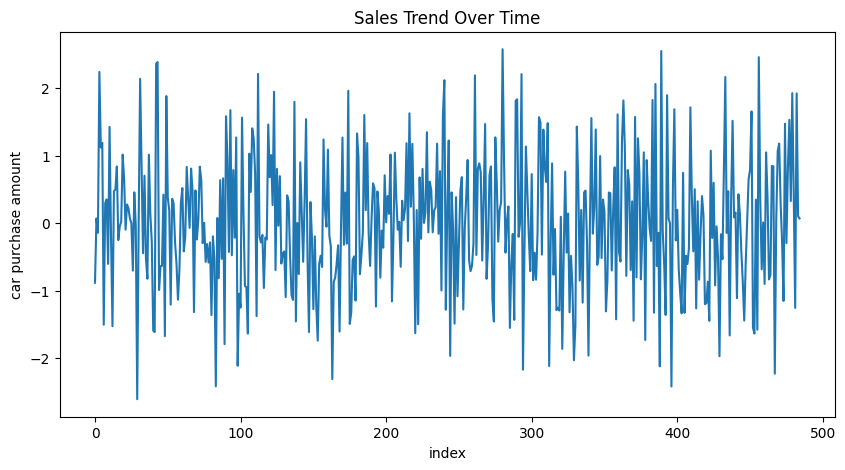

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  # You need Seaborn as well for sns.lineplot

df["index"] = range(len(df))  # Create an index column
plt.figure(figsize=(10,5))
sns.lineplot(x=df['index'], y=df['car purchase amount'])
plt.title("Sales Trend Over Time")
plt.show()


customer name        object
customer e-mail      object
country              object
gender              float64
age                 float64
annual Salary       float64
credit card debt    float64
net worth           float64
index                 int64
dtype: object
gender                    0
age                       0
annual Salary             0
credit card debt          0
net worth                 0
                         ..
country_Western Sahara    0
country_Yemen             0
country_Zimbabwe          0
country_marlal            0
country_Åland Islands     0
Length: 1181, dtype: int64
     Actual Sales  Predicted Sales
430     -1.198325        -1.228982
490     -0.295776        -0.148905
184      0.970480         0.902968
461     -0.597837        -0.641126
417     -0.481614        -0.343544
                                               Feature  Importance
1                                                  age    0.395320
2                                        annual Salary 

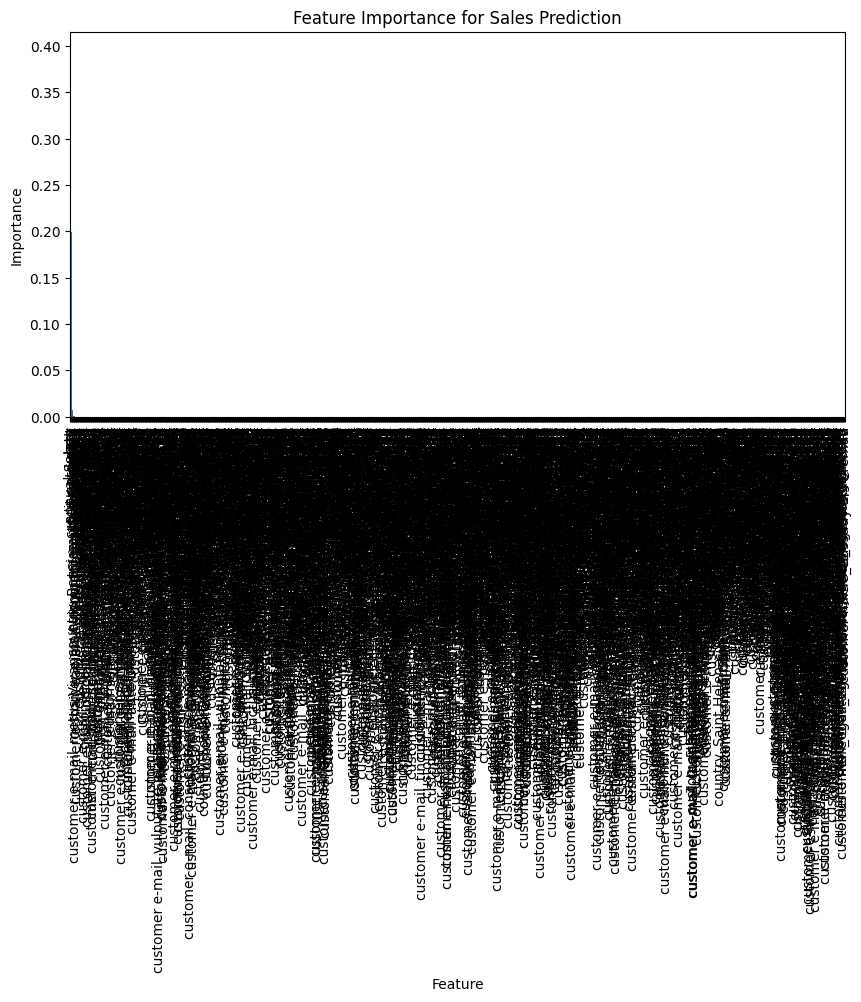

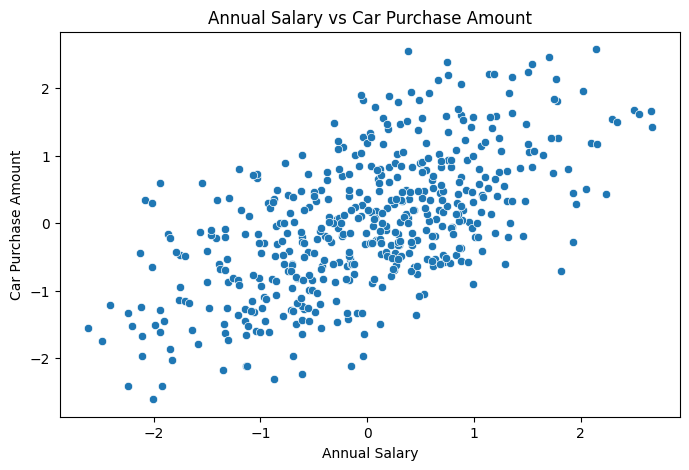

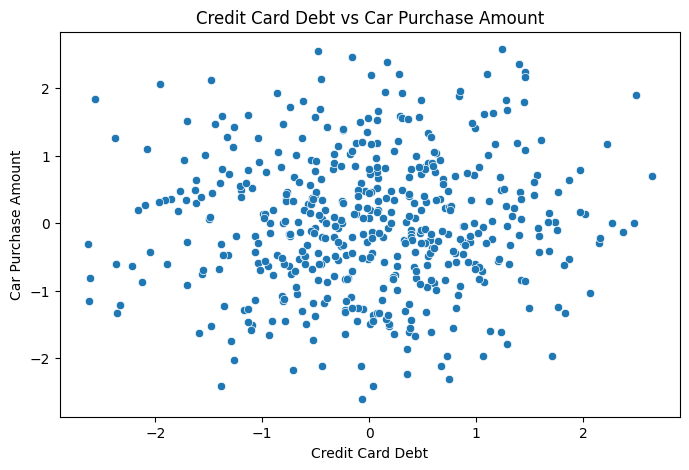

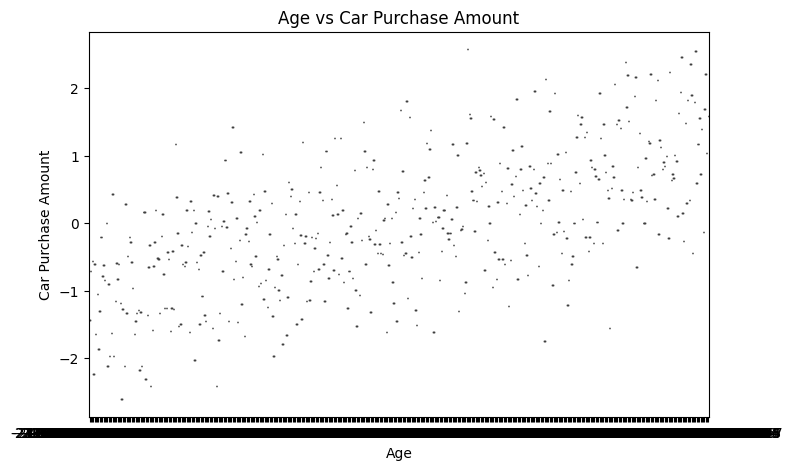

In [7]:
X = df.drop(columns=["car purchase amount"])  # Predicting "car purchase amount"
y = df["car purchase amount"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
print(X_train.dtypes)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.isnull().sum())
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
results = pd.DataFrame({"Actual Sales": y_test, "Predicted Sales": y_pred})
print(results.head())
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)
importances = model.feature_importances_  # Get feature importance scores
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print("\nTop Factors Influencing Sales:\n", feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df["Feature"], y=feature_importance_df["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance for Sales Prediction")
plt.show()
# Relationship between Annual Salary & Car Purchase Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['annual Salary'], y=df['car purchase amount'])
plt.title("Annual Salary vs Car Purchase Amount")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['credit card debt'], y=df['car purchase amount'])
plt.title("Credit Card Debt vs Car Purchase Amount")
plt.xlabel("Credit Card Debt")
plt.ylabel("Car Purchase Amount")
plt.show()
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['age'], y=df['car purchase amount'])
plt.title("Age vs Car Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")
plt.show()



In [8]:
#model elevation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.17245301975146884
Mean Squared Error: 0.05912905005735014
R² Score: 0.9305270919739669
